# Project 3
## B-IT Pattern Recognition



Presented on 4-Jan-2016 by:

- Abdullah Abdullah

- Can Güney Aksakallı

- Kang Cifong

- Umut Hatipoğlu

***

In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, kmeans2

import pattrex.plotting_mpl as plt_rex
import pattrex.dimred as dim_rex
import pattrex.fun_with_k_means as km_rex
import pattrex.SpectralClustering as sc_rex
import pattrex.SpectralClustering_AndrewNg as scan_rex

## Task 3.1
### Fun with k-means clustering
***

In [2]:
def demo_1_data():
    data = np.genfromtxt("./data/data-clustering-1.csv", delimiter=',')
    print("{} samples of {} dimensional data".format(*(data.T).shape))
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    
    plt_rex.plot2d(data, colwise_data=True, show=False, hatch='k.', 
                   title="Data", axs=ax)
    
    return data.T

### The Data

200 samples of 2 dimensional data


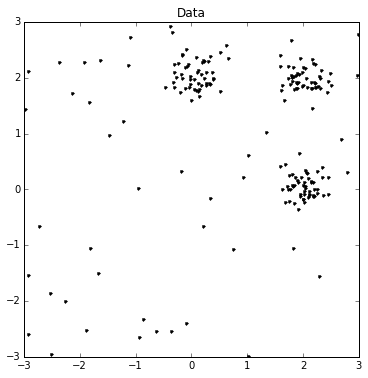

In [3]:
mydata = demo_1_data()

In [4]:
def demo_1_init(data, k, seed=9000):
    nX, mX = data.shape
    np.random.seed(seed)
    
    # Random choices from data
    m1 = np.copy(data[np.random.choice(np.arange(nX), size=k)])
    
    np.random.seed(seed + seed)
    
    # Random choice of one
    m2 = np.copy(data[np.random.choice(np.arange(nX), size=k)])
    
    # explicit init
    m3 = np.array([
            [2, 2],
            [0, 2],
            [2, 0]
        ])
    
    return m1, m2, m3

In [5]:
def demo_1_lloyd(data, k):
    inits = demo_1_init(data, k, seed=800)
    titles = [
        "Lloyd's - {} random choices to init 1".format(k),
        "Lloyd's - {} random choices to init 2".format(k),
        "Lloyd's - human init",
    ]
    fig = plt.figure(figsize=(15, 5))
    sp = [1, 3, 0]
    
    for i, t in zip(inits, titles):
        try:
            m, l = km_rex.lloyd2(data, i, verbose=True)
        except UserWarning:
            print("Did not converge for {}".format(t))
        
        # plotting
        sp[-1] += 1
        ax = fig.add_subplot(*sp)
        
        h_d = ['r.', 'g.', 'b.']
        h_m = ['rs', 'gs', 'bs']
        h_i = ['ko', 'ko', 'ko']
        for c, hd, hm, hi in zip(range(k), h_d , h_m, h_i):
            plt_rex.plot2d(data[l == c], False, show=False, axs=ax,
                           hatch=hd, 
                           title=t)
            plt_rex.plot2d(m[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hm)
            plt_rex.plot2d(i[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hi)
            
def demo_1_hart(data, k, seeds):
    titles = ["Hartigan's - Random Seed {}".format(s) for s in seeds]
    fig = plt.figure(figsize=(15, 5))
    sp = [1, 3, 0]
    
    for s, t in zip(seeds, titles):
        try:
            m, l = km_rex.hartigan2(data, k, seed=s)
        except UserWarning:
            print("Did not converge for {}".format(t))
        
        # plotting
        sp[-1] += 1
        ax = fig.add_subplot(*sp)
        
        h_d = ['r.', 'g.', 'b.']
        h_m = ['rs', 'gs', 'bs']
#         h_i = ['ko', 'ko', 'ko']
        for c, hd, hm in zip(range(k), h_d , h_m):
            plt_rex.plot2d(data[l == c], False, show=False, axs=ax,
                           hatch=hd, 
                           title=t)
            plt_rex.plot2d(m[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hm)
#             plt_rex.plot2d(i[c, :].reshape(1, m.shape[1]), False, show=False, 
#                            axs=ax, hatch=hi)

def demo_1_macqueen(data, k, seeds):
    titles = ["MacQueen's"] + \
        ["MacQueen's - Random shuffle {}".format(s) for s in seeds]
    fig = plt.figure(figsize=(15, 5))
    sp = [1, 3, 0]
    
    datas = [np.copy(data)]
    for s in seeds:
        np.random.seed(s)
        np.random.shuffle(data)
        datas.append(np.copy(data))
        
    
    for d, t in zip(datas, titles):
        try:
            m, l = km_rex.mcqueen2(d, k)
        except UserWarning:
            print("Did not converge for {}".format(t))
        
        # plotting
        sp[-1] += 1
        ax = fig.add_subplot(*sp)
        
        h_d = ['r.', 'g.', 'b.']
        h_m = ['rs', 'gs', 'bs']
        h_i = ['ko', 'ko', 'ko']
        i = d[:k, :]
        for c, hd, hm, hi in zip(range(k), h_d , h_m, h_i):
            plt_rex.plot2d(d[l == c], False, show=False, axs=ax,
                           hatch=hd, 
                           title=t)
            plt_rex.plot2d(m[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hm)
            plt_rex.plot2d(i[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hi)

### Lloyd's Algorithm

- Very Sensitive to initialization values

- Converges, but no guarantees (esp in case of bad initializations)

- No Guarantee about the results either

- Really Fast (if no catastrophy)

Converged after 4 iterations
Converged after 9 iterations
Converged after 3 iterations


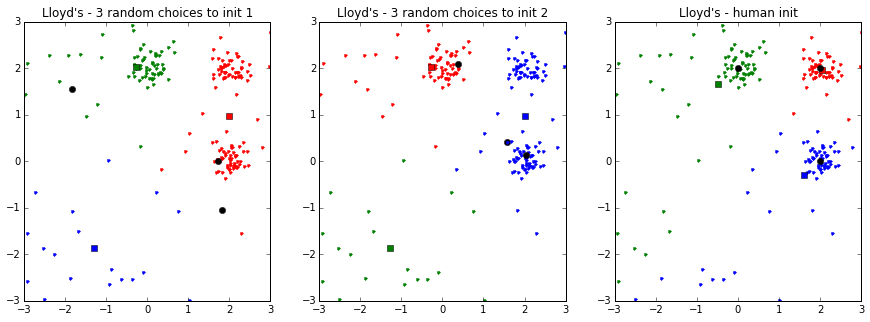

In [6]:
demo_1_lloyd(mydata, 3)

In [7]:
def demo_1_lloyd2(data, k, dist, seed):
    i = demo_1_init(data, k, seed=seed)[0]
    titles = [
        "Lloyd's - random choices to init - {}".format(d) for d in dist]
    fig = plt.figure(figsize=(15, 5))
    sp = [1, 3, 0]
    
    for d, t in zip(dist, titles):
        try:
            m, l = km_rex.lloyd2(data, i, verbose=True, metric=d)
        except UserWarning:
            print("Did not converge for {}".format(t))
        
        # plotting
        sp[-1] += 1
        ax = fig.add_subplot(*sp)
        
        h_d = ['r.', 'g.', 'b.']
        h_m = ['rs', 'gs', 'bs']
        h_i = ['ko', 'ko', 'ko']
        for c, hd, hm, hi in zip(range(k), h_d , h_m, h_i):
            plt_rex.plot2d(data[l == c], False, show=False, axs=ax,
                           hatch=hd, 
                           title=t)
            plt_rex.plot2d(m[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hm)
            plt_rex.plot2d(i[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hi)

### Different Similarity Measures

- The data does seem to have **Gaussian Blobs**

    + The problem with the data is different
    
- Different similarity metric will probably not give different results
    
    + Except in case of relatively bad similarity metrics

Converged after 4 iterations
Converged after 4 iterations
Converged after 4 iterations
Converged after 5 iterations
Converged after 5 iterations
Converged after 5 iterations


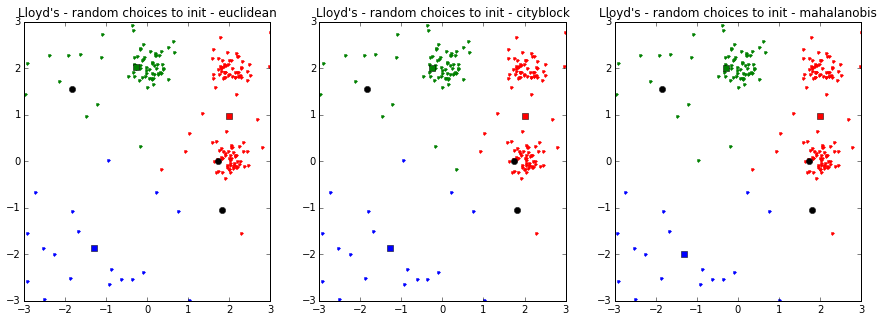

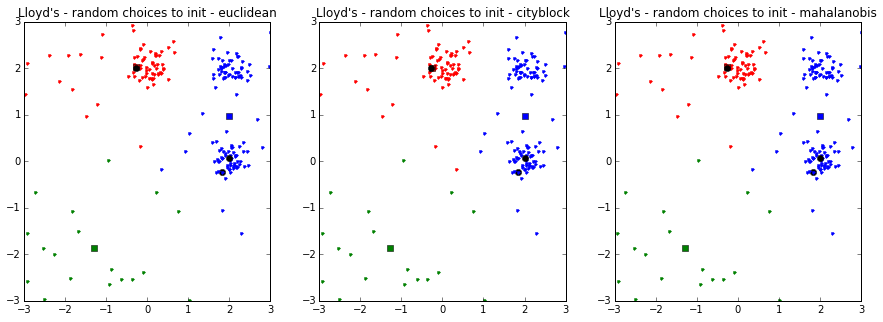

In [8]:
demo_1_lloyd2(mydata, 3, ['euclidean', 'cityblock', 'mahalanobis'], 800)
demo_1_lloyd2(mydata, 3, ['euclidean', 'cityblock', 'mahalanobis'], 999)

### Hartigan's Algorithm
- Converges quickly

- Still sensitive to initialization of classes

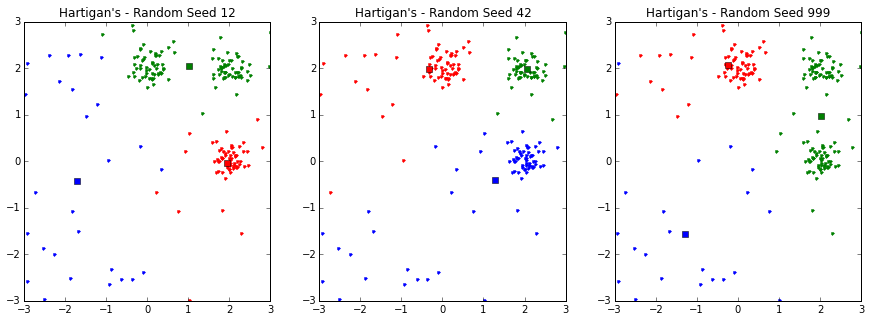

In [9]:
demo_1_hart(mydata, 3, [12, 42, 999])  # These took some time to choose

#### Smarter Way?

- We couldn't figure out any smarter way, than :
    
    + only recalculate objective function for the current class
        
        + Not reliable, esp when the data is disproportionate among classes
    
    + Halved the number of data points for which the distance is calculated, compared to Naive
    
        + Does not fully utilize the potential, eg vectorization

### MacQueen's Algorithm

- Convenient for streams

- Sensitive to order of data
    
    + Essentially, still sensitive to initialization

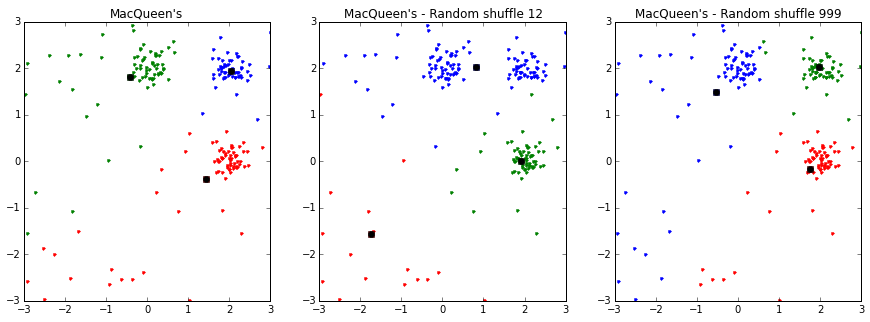

In [10]:
demo_1_macqueen(mydata, 3, [12, 999])

In [51]:
def demo_1_t():
    print("Mac OSX - 10.11.3")
    print("2,9 GHz Intel Core i7")
    print("Python 3.4")
    print("\nLloyd - Naive")
    %timeit km_rex.kmeans_Lloyd(mydata, 3, init_c, save_plot=False)
    
    print("\nLloyd - 2")
    %timeit km_rex.lloyd2(mydata, init_c, verbose=False)
    
    print("\nLloyd - sklearn.cluster.KMeans")
    %timeit KMeans(n_clusters=3).fit(mydata)
    
    print("\n?? - scipy.cluster.vq.kmeans")
    %timeit kmeans(mydata, 3, check_finite=False)
    
    print("\n?? - scipy.cluster.vq.kmeans2")
    %timeit kmeans2(mydata, 3, minit='points', check_finite=False)
    
    print("\nHartigan - Naive")
    %timeit km_rex.kmeans_hartigans(mydata, 3, save_plot=False, show_plot=False)
    
    print("\nHartigan - 2")
    %timeit km_rex.hartigan2(mydata, 3, seed=9000)
    
    print("\nMacQueen - Naive")
    %timeit km_rex.kmeans_macqueen(mydata, 3, save_plot=False)
    
    print("\nMacQueen - 2 (numpy-ed)")
    %timeit km_rex.mcqueen2(mydata, 3)
    
    t = [
        (32e-3, "LN"),
        (833e-6, "L2"),
        (15.1e-3, "Lsk"),
        (10.8e-3, "?sp"),
        (880e-6, "?sp2"),
        (354e-3, "HN"),
        (66.7e-3, "H2"),
        (18.1e-3, "MN"),
        (9.44e-3, "M2")
    ]
    
    tt = [t_[0] for t_ in t]
    tl = [t_[1] for t_ in t]
    
    fig, ax = plt.subplots()
    ax.bar(np.arange(len(tt)), tt)
    ax.set_xticklabels(tl)
    

### Run times!

Mac OSX - 10.11.3
2,9 GHz Intel Core i7
Python 3.4

Lloyd - Naive
10 loops, best of 3: 31.5 ms per loop

Lloyd - 2
1000 loops, best of 3: 864 µs per loop

Lloyd - sklearn.cluster.KMeans
100 loops, best of 3: 15.3 ms per loop

?? - scipy.cluster.vq.kmeans
100 loops, best of 3: 10.6 ms per loop

?? - scipy.cluster.vq.kmeans2
1000 loops, best of 3: 906 µs per loop

Hartigan - Naive
1 loops, best of 3: 488 ms per loop

Hartigan - 2
10 loops, best of 3: 67.1 ms per loop

MacQueen - Naive
100 loops, best of 3: 18.5 ms per loop

MacQueen - 2 (numpy-ed)
100 loops, best of 3: 9.41 ms per loop


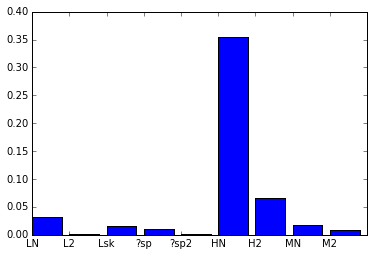

In [53]:
np.random.seed(9000)
init_c = np.copy(mydata[np.random.choice(np.arange(mydata.shape[0]), size=3)])
demo_1_t()

## Task 3.2
### Spectral Clustering
***

### Syllabus
- Apply K-means

- Apply Spectral Clustering

- Apply Spectral Clustering using Andrew Ng's Alorithm

In [56]:
def demo_2_1():
    my_data = np.genfromtxt('data/data-clustering-2.csv', delimiter=',')
    x = my_data[0,:]
    y = my_data[1,:]

    # plotting
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)

    plt_rex.plot2d(my_data, colwise_data=True, hatch='bo', 
                  show=False, axs=axs, set_aspect_equal=False, 
                   title="data")
    
    return my_data

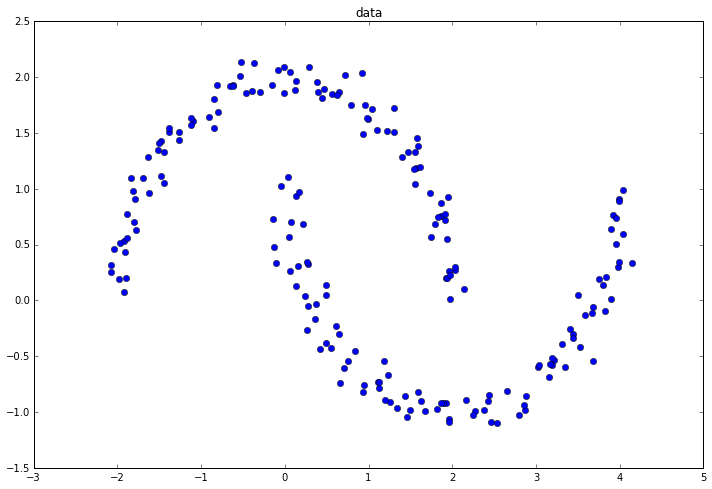

In [57]:
my_data = demo_2_1()

### Apply K-means on Data

In [65]:
def demo_2_2(my_data):
    k = 2
    data = my_data.T
    centroidsInit = np.array([[1, 2], [3, 4]])
    centroids, idx = km_rex.lloyd2(data, centroidsInit, verbose=False)
    # idx, _ = km_rex.vq(data, centroids)
    km_rex.show_plotted_cluster(data, idx, centroids, "Lloyd's algorithm",k)

    # Hartigan's algorithm
    centroids, idx = km_rex.hartigan2(data, k)
    km_rex.show_plotted_cluster(data, idx, centroids, "Hartigan's algorithm",k)

    # MacQueen's algorithm
    centroids, idx = km_rex.mcqueen2(data, k)
    km_rex.show_plotted_cluster(data, idx, centroids, "MacQueen's algorithm",k)

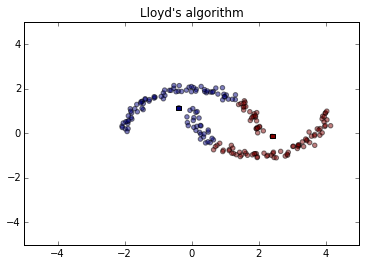

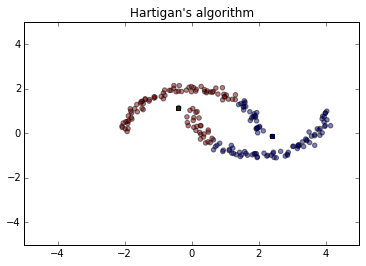

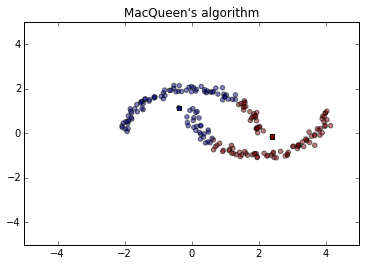

In [66]:
demo_2_2(my_data)

## Apply Spectral Clustering on Data
- Get a good result at beta = 11
- By observation, we see that some edges points would be mis-judged as beta grows from 1 to 15
- The Upper half contains 100 points, and so is the lower half.

### Play around the number of halfs
- See how the number of halfs changes

In [12]:
def demo_2_4(my_data):
    for i in np.arange(1,20,1):
        ur,index,u_idx_pos,u_idx_neg = sc_rex.SpectralClustering(my_data, i)
        if(len(u_idx_pos[0])>=(len(u_idx_neg[0]))):
            print(i,len(u_idx_pos[0]))
        else:
            print(i,len(u_idx_neg[0]))
        if(len(u_idx_pos[0])==(len(u_idx_neg[0]))):
            print("Got",i," with 100 each")
            sc_rex.plot(my_data,ur,index,u_idx_pos,u_idx_neg)

1 103
2 104
3 101
4 104
5 109
6 114
7 116
8 116
9 115
10 107
11 100
Got 11  with 100 each
12 114
13 105
14 112
15 113
16 113
17 114
18 121
19 107


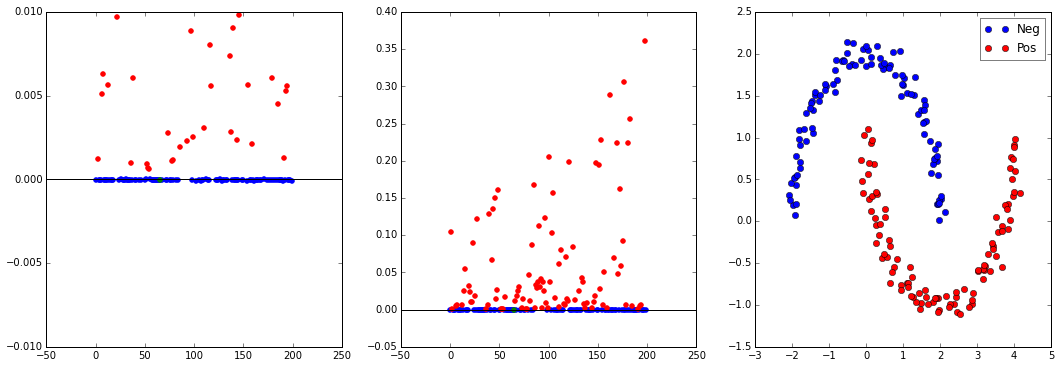

In [13]:
demo_2_4(my_data)

## Exam the Laplacian Matrix
- S = exp(-beta* |x_i-x_j|^2) which is indepandent on the data order
- D = Sum(j to n)(Sij) if i=j which is depandent on the data order
- L = D - S 

### Shuffle the data order to see the result
- we would have a differnet beta or even unable to get one sometime. Sometimes we got a lot
- But we see that the upper half gathered close to y=0 line, while the lower half spread around.

In [15]:
def demo_2_5(my_data):
    idx = np.arange(0,200,1)
    np.random.shuffle(idx)
    
    for i in np.arange(1,20,1):
        ur,index,u_idx_pos,u_idx_neg = sc_rex.SpectralClustering(my_data[:,idx], i)
        if(len(u_idx_pos[0])==(len(u_idx_neg[0]))):
            print("Got",i)
        sc_rex.plot(my_data[:,idx],ur,index,u_idx_pos,u_idx_neg)

Got 5
Got 16


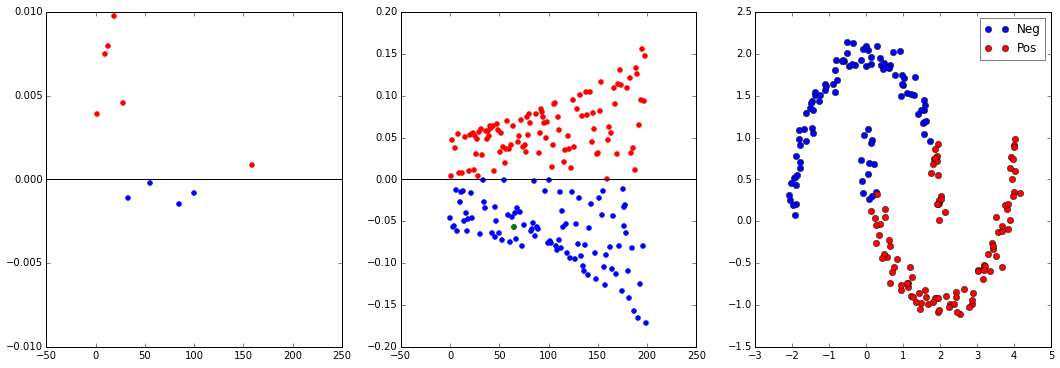

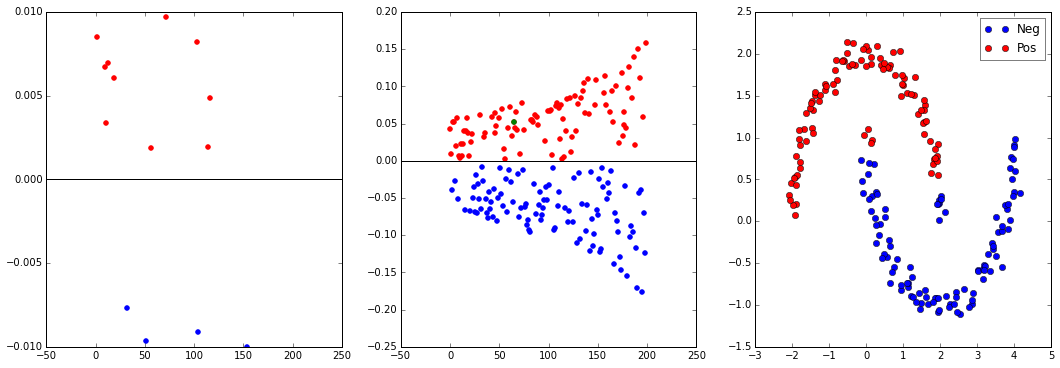

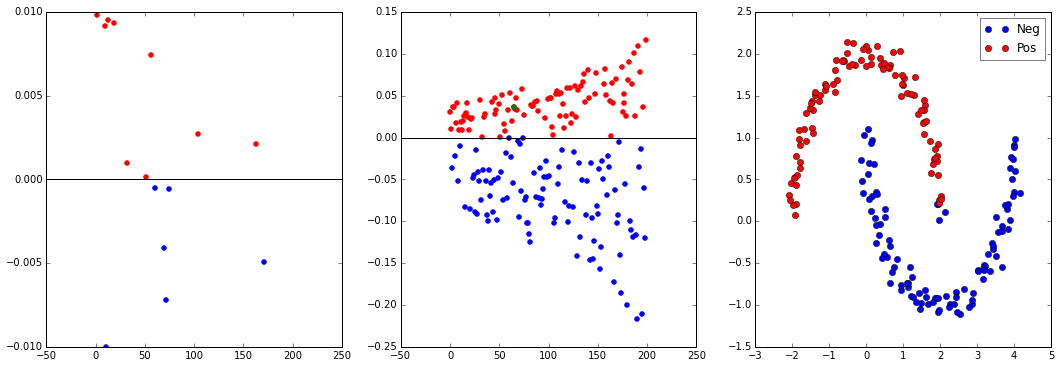

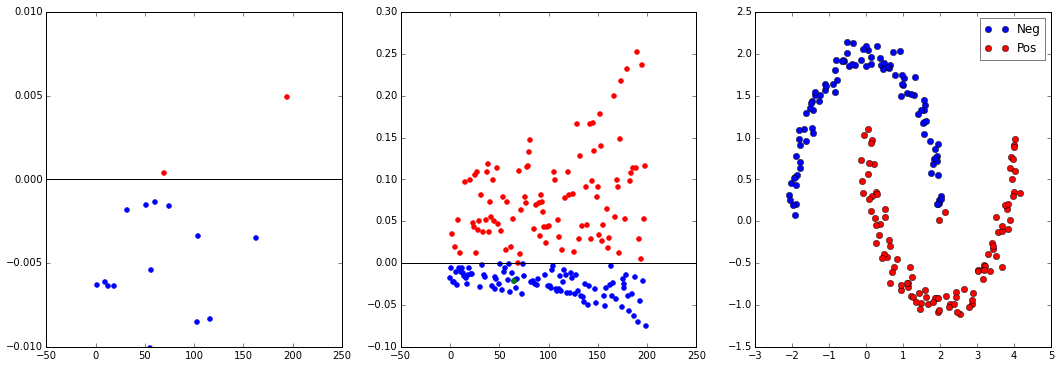

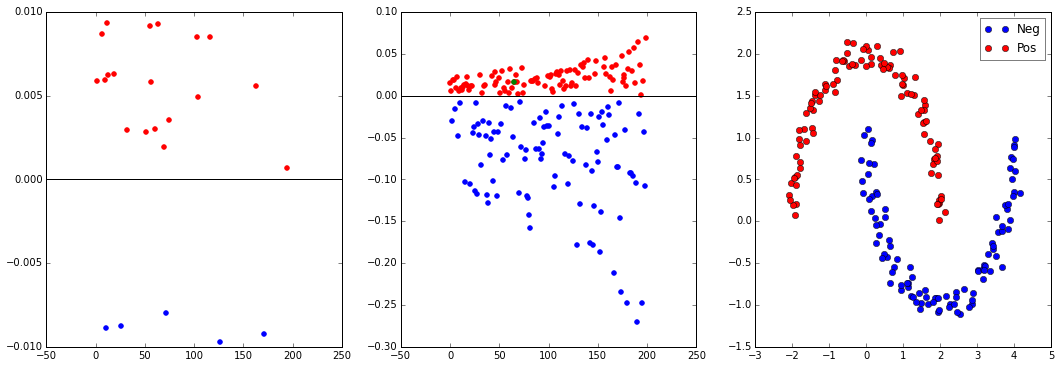

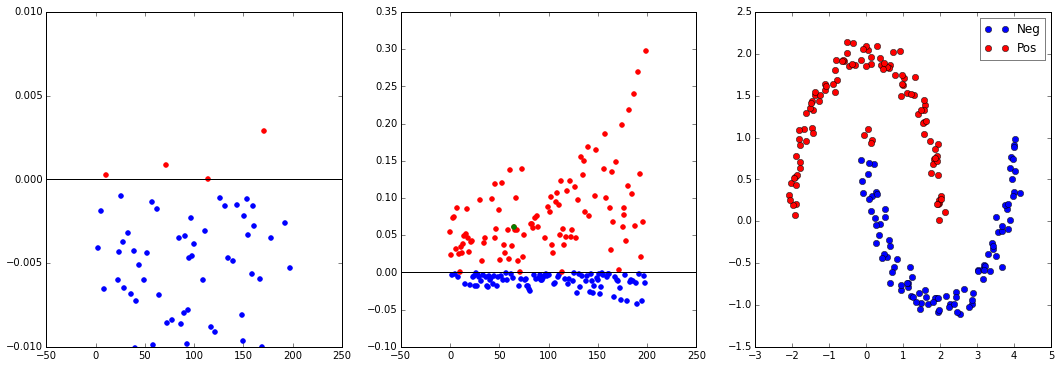

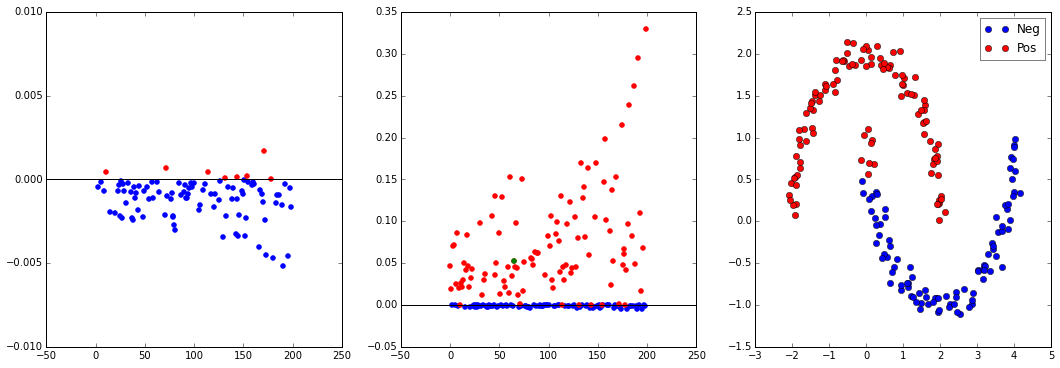

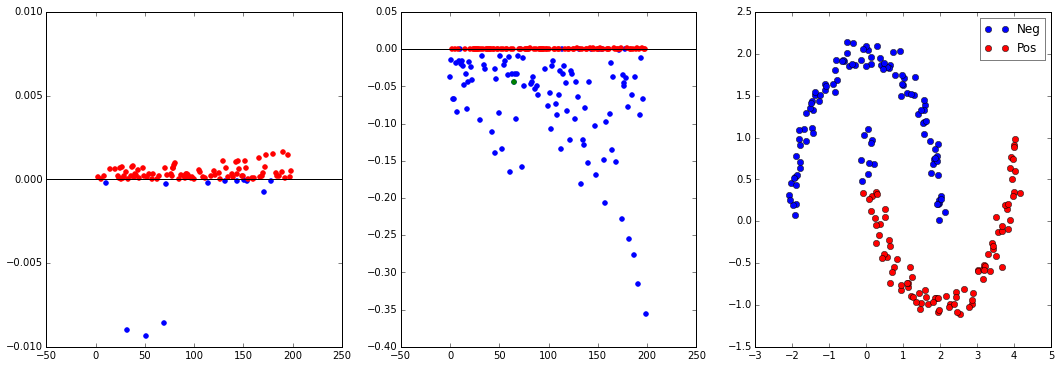

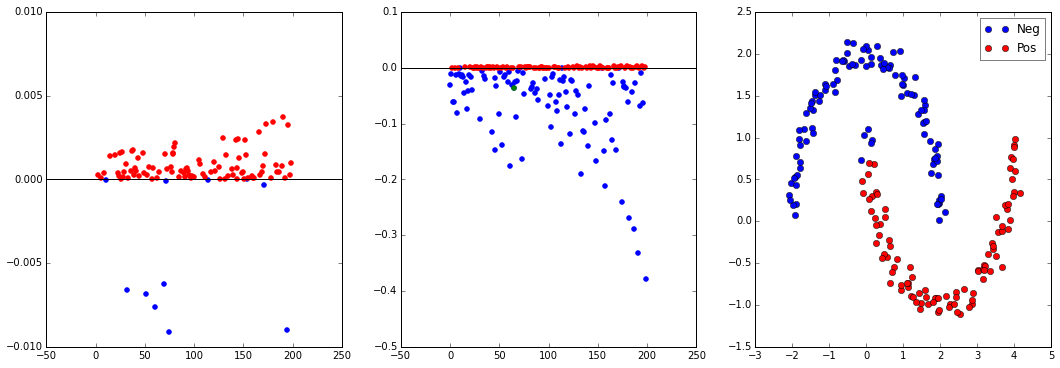

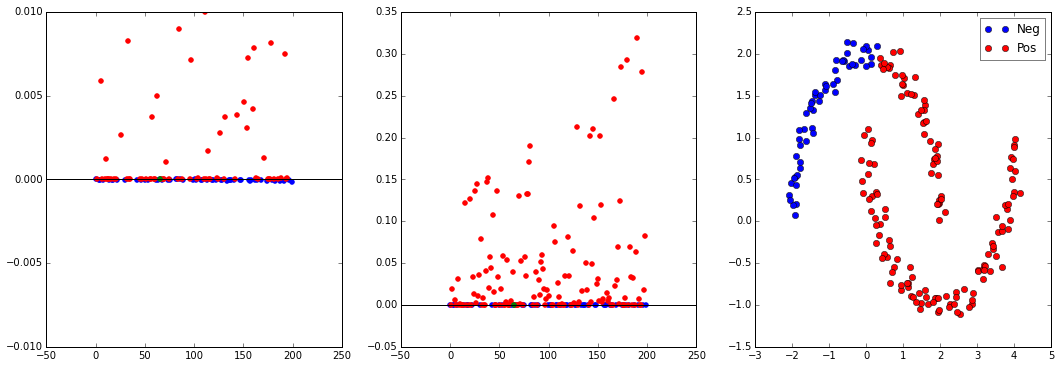

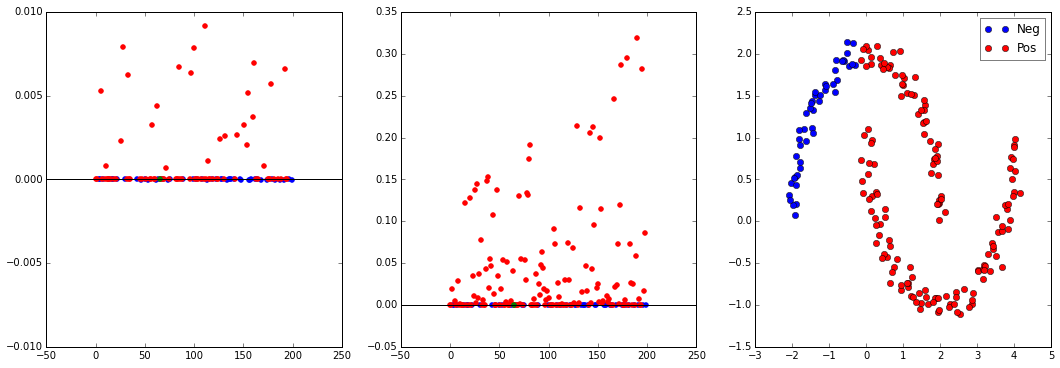

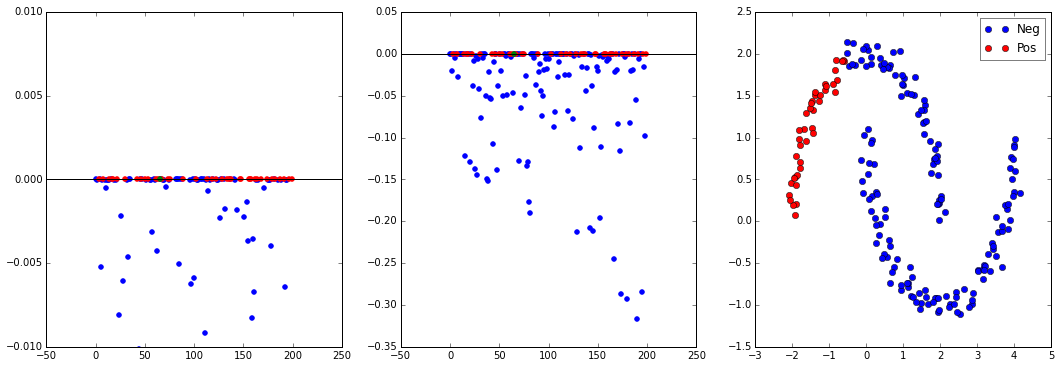

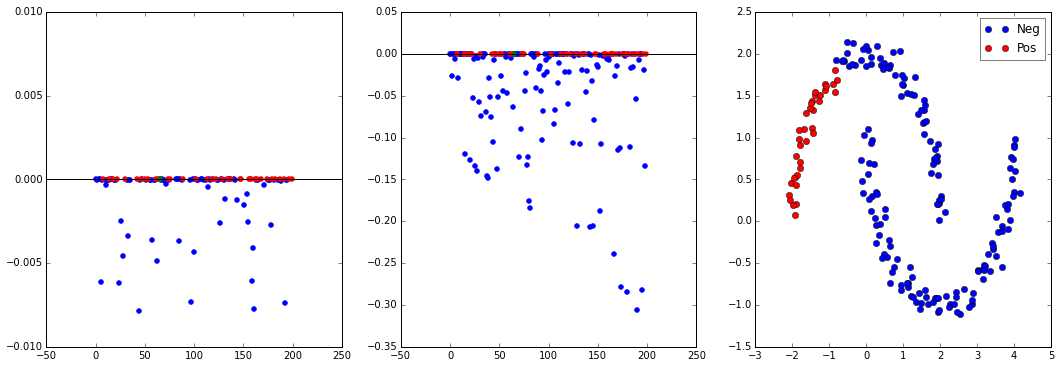

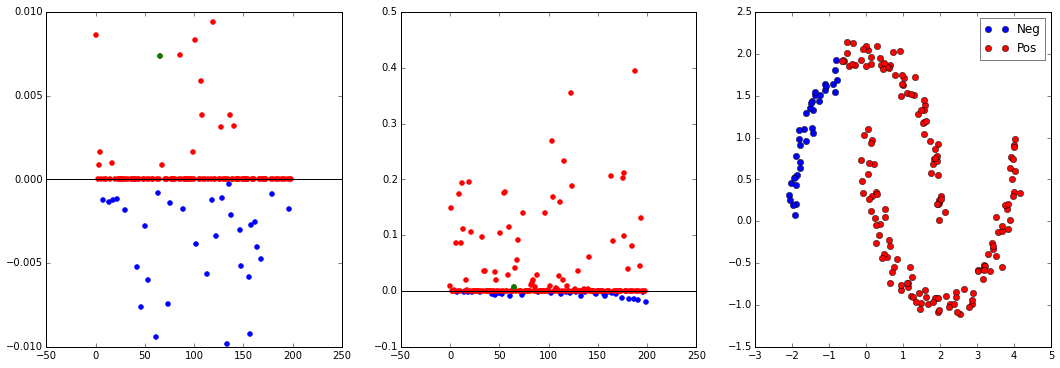

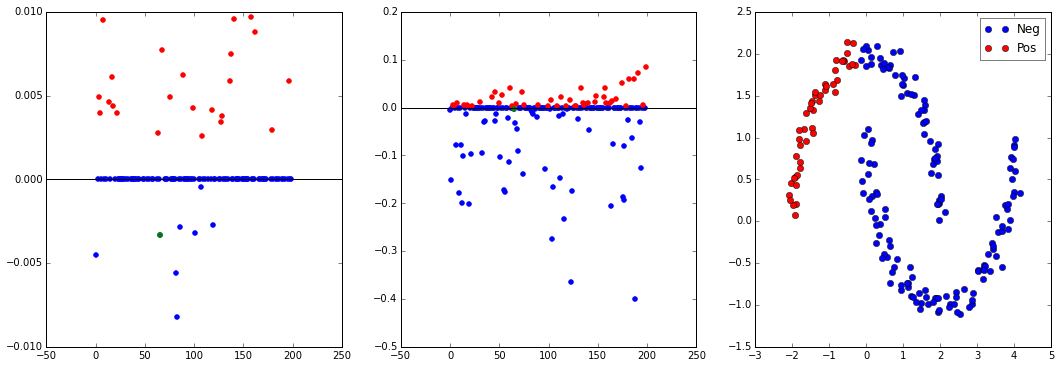

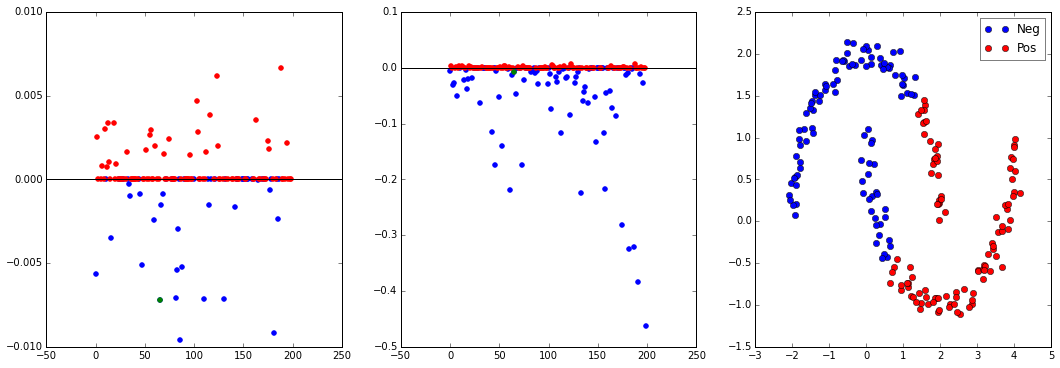

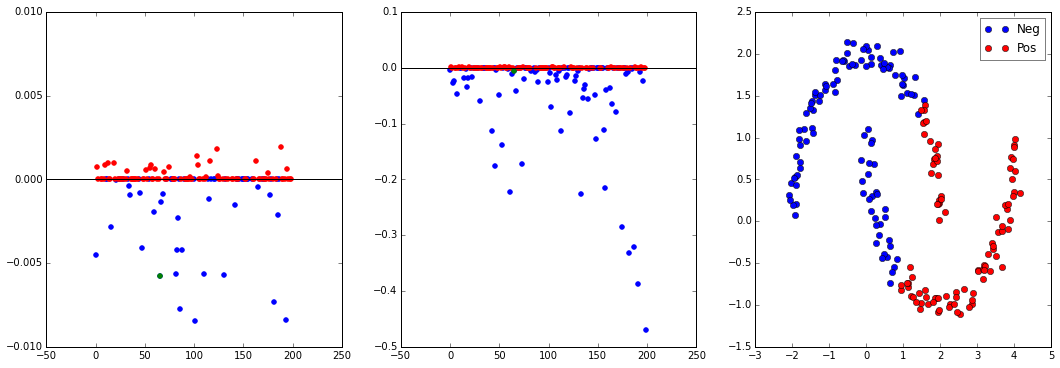

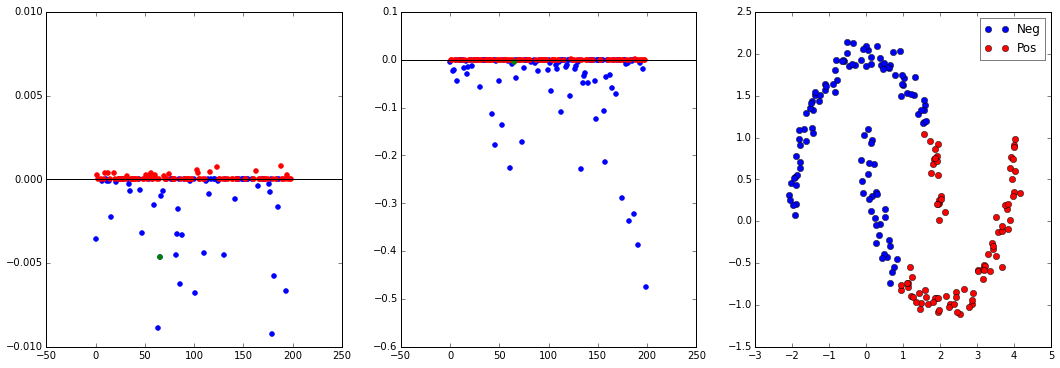

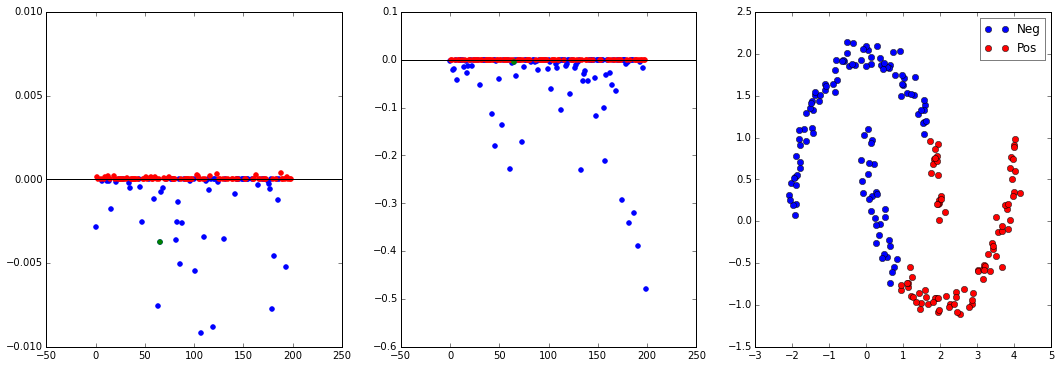

In [16]:
demo_2_5(my_data)

## Spectral Clustering using Andrew Ng's Algorithm
- On Spectral Clustering: Analysis and an algorithm by Andre Ng, etc.
- S = exp(-|x_i-x_j|^2 / 2*(sigma^2))
- D = diagonal matrix whose (i, i)-element is the sum of A's i-th row
- L = D^(-1/2)AD^(-1/2)
- FInd the k largest eigenvectors of L and normalized them into matrix X
- Treating X as new set of data, apply k-means clustering
- Based on the clustering result to cluster the original data

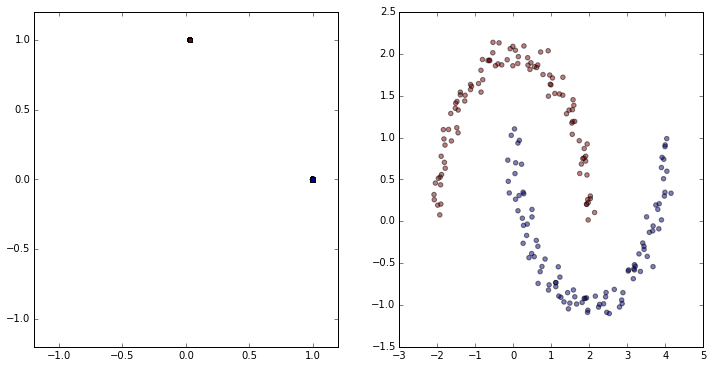

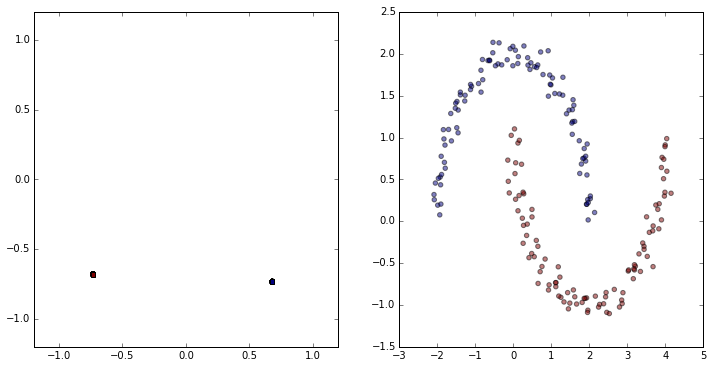

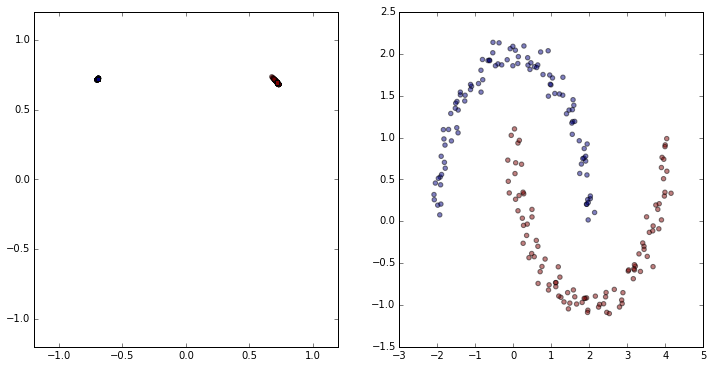

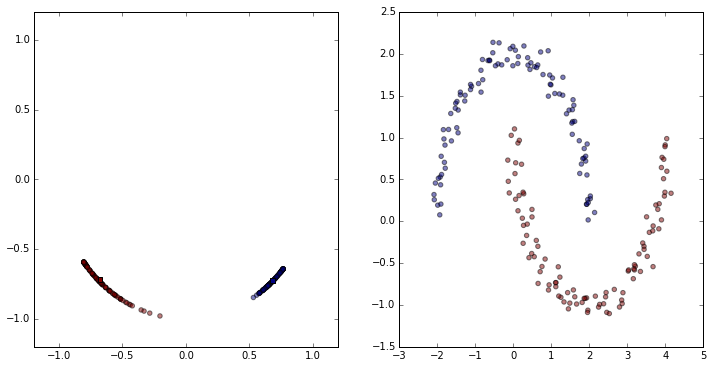

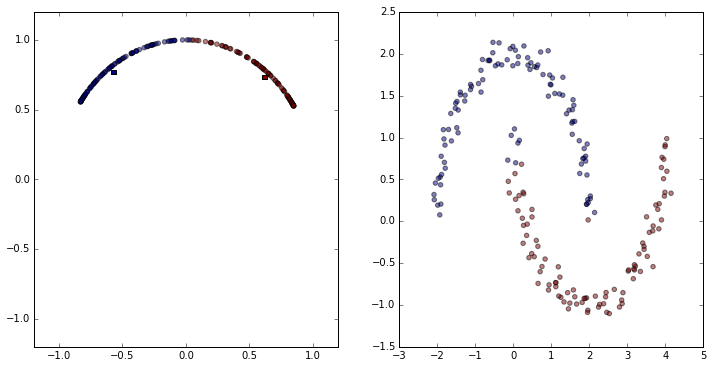

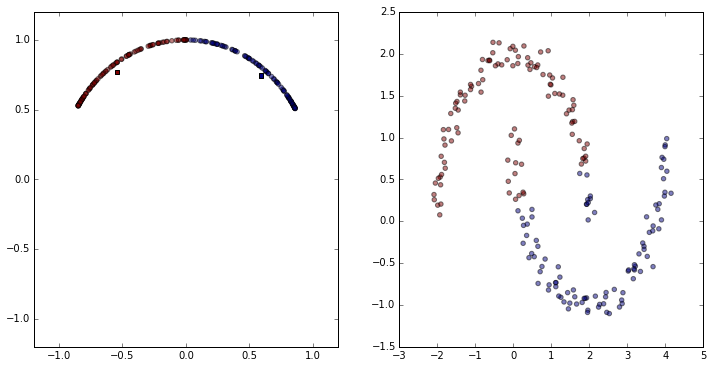

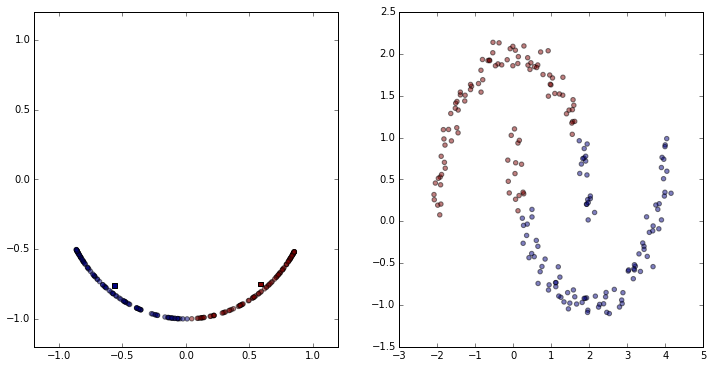

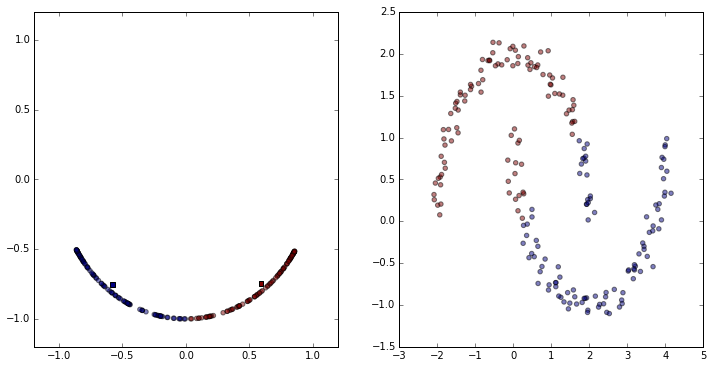

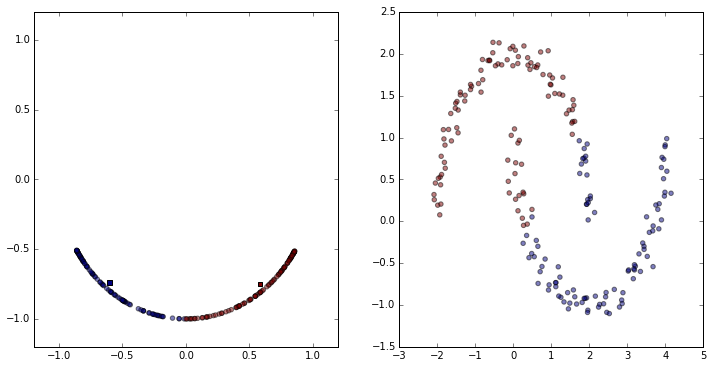

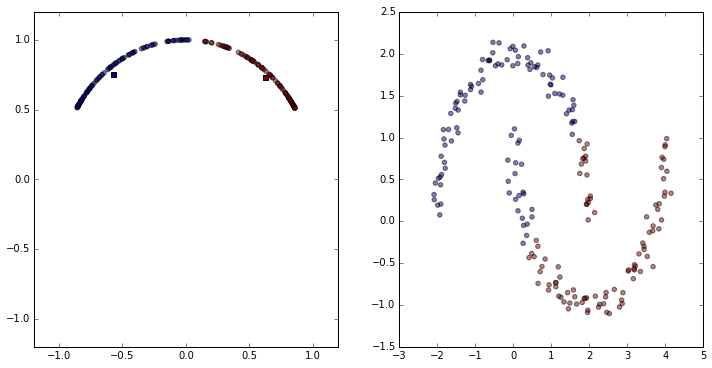

In [19]:
scan_rex.demo1(my_data,2, 0.05, 1, 0.1)  #(my_data,k, sigma, start, end, step):

### Shuffle the data order to see the result
- We would have same L on differnet odering of data
- As prediction, the resulting sigma would not change

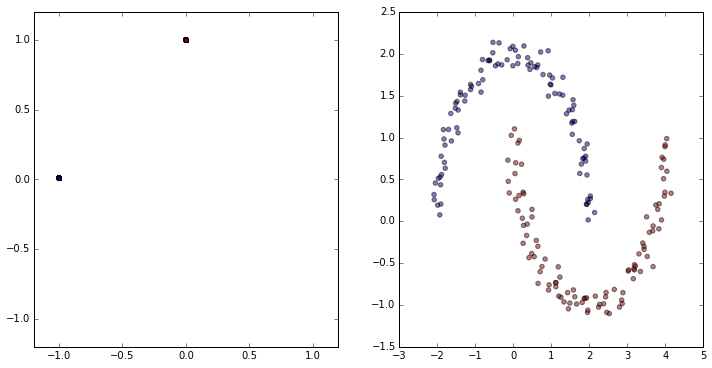

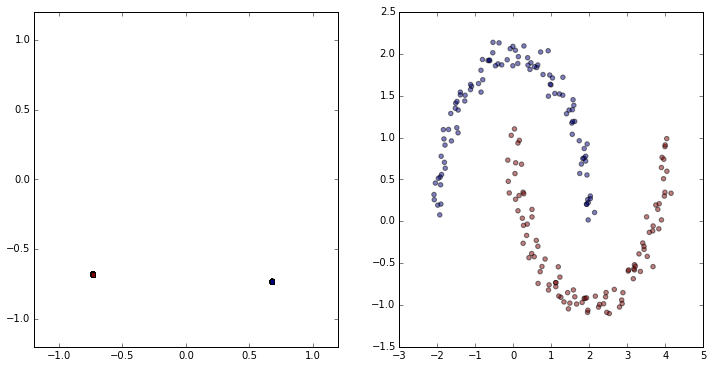

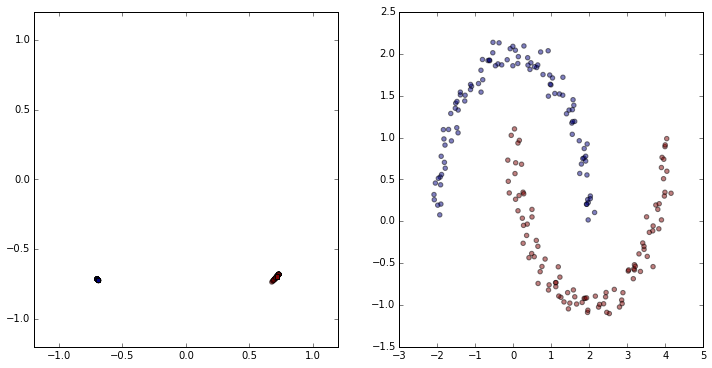

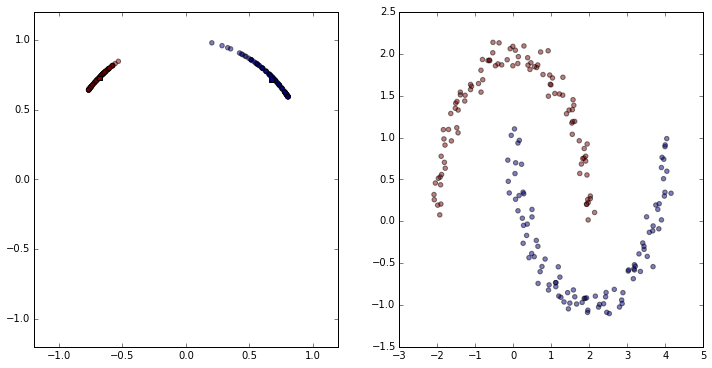

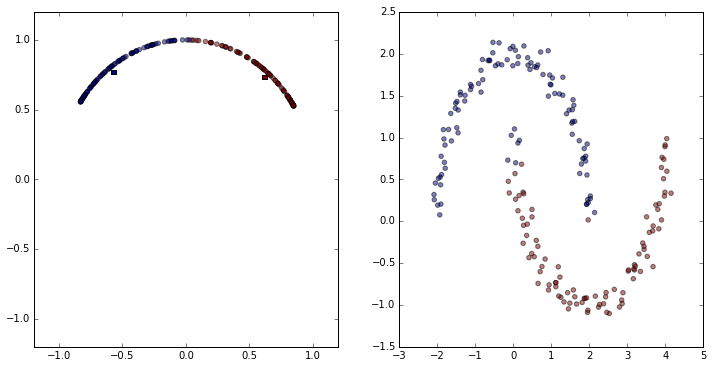

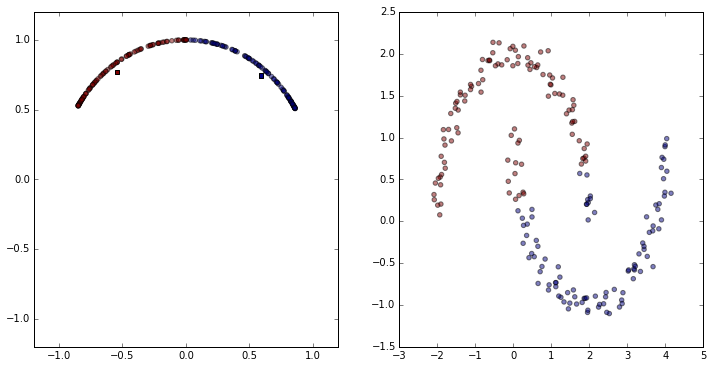

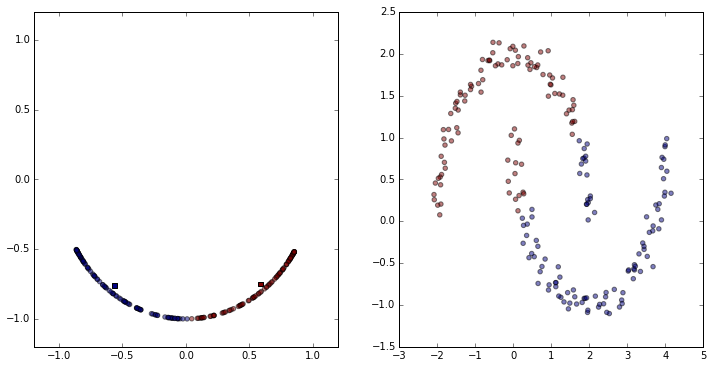

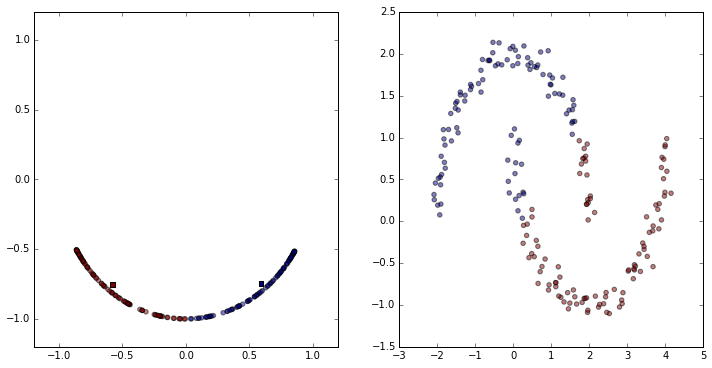

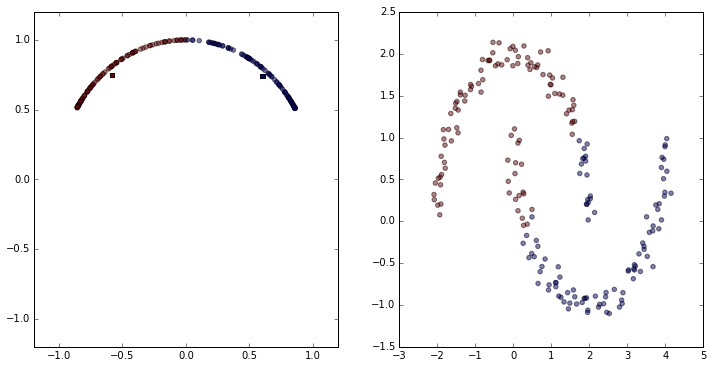

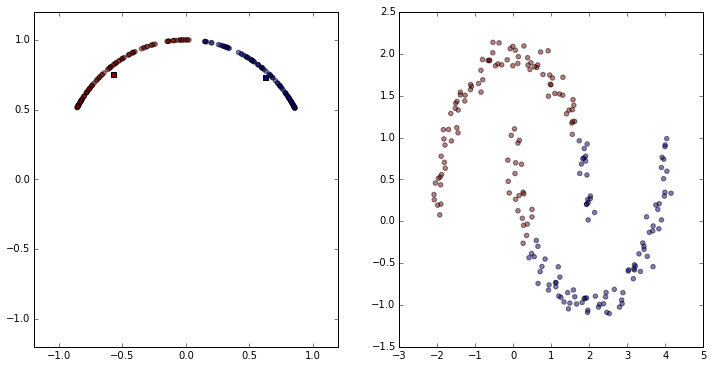

In [20]:
idx = np.arange(0,200,1)
np.random.shuffle(idx)
scan_rex.demo1(my_data[:,idx],2, 0.05, 1, 0.1)  #(my_data,k, sigma, start, end, step):

## Discussion
- Even if the data is shuffled, the sigma to generate good clustering is stable.
- We could evaluate the result based on how tight the processed group is.
- It is easier to determine whether this Y is valid or not.

## Evaluate the tightness of Data
- Variance
- Support Vector Machine

## Task 3.3
### Dimensionality Reduction
***

In [5]:
data_X = np.genfromtxt("./data/data-dimred-X.csv", delimiter=',')
data_y = np.genfromtxt("./data/data-dimred-y.csv", delimiter=',')

In [8]:
def demo_3(X, y, k, err=0.0, ddof=0, use_eigh=True):
    print("\n# PCA ######################################")
    res_pca = dim_rex.pca(X, k=k, err=err, use_eigh=use_eigh)
    
    print("\n# LDA ######################################")
    res_lda = lda(X, y, k=k, err=err, use_eigh=use_eigh, ddof=ddof)
        
    projections = [res_pca[0], res_lda[0]]
    classes = np.unique(y)

    # Plotting
    fig = plt.figure(figsize=(12, 8))
    sbp = [1, 2, 0]
    
    for p, t in zip(projections, ["{}D PCA".format(k), "{}D LDA".format(k)]):
        sbp[-1] += 1
        ax = fig.add_subplot(*sbp)
        for c, h in zip(classes, ['r.', 'g.', 'b.']):
            plt_rex.plot2d(p[y == c], False, 
                           axs=ax, hatch=h, show=False, 
                           plotlabel="class {}".format(c), title=t)
        
    return res_pca, res_lda


# PCA ######################################
Found that choosing k as 2 will lead to at most error 59.310584579881876%

# LDA ######################################
Found 3 classes of 500 dimensional data
Class 1.0: 50 samples
Class 2.0: 50 samples
Class 3.0: 50 samples
Found that choosing k as 2 will lead to at most error 77.29489861745998%


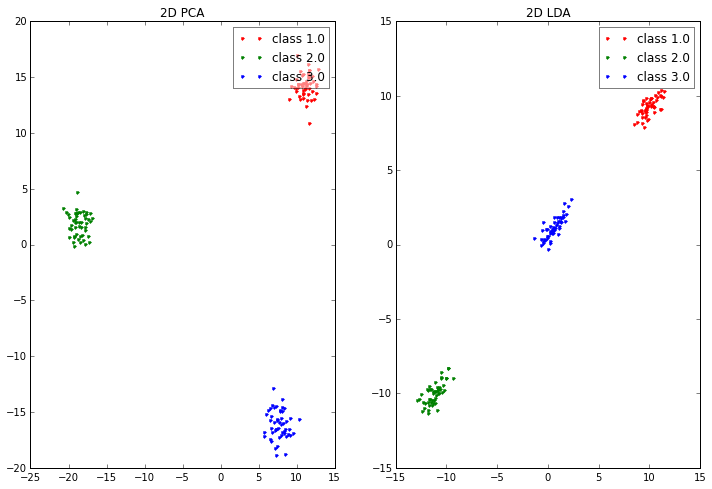

In [9]:
res_pca, res_lda = demo_3(data_X, data_y, 2)

In [2]:
import numpy.linalg as la
def lda(X, y, k=None, err=0.0, use_eigh=True, ddof=0):
    # find the number of classes and corresponding datas and their mean and cov
    classes = np.unique(y)
    dim = X.shape[0]
    X_mean = np.mean(X, axis=1).reshape(dim, 1)

    S_w = np.zeros((dim, dim))
    S_b = np.zeros((dim, dim))

    datas = dict()
    for c in classes:
        datas[c] = dict()
        X_c = X[:, y == c]
        n = X_c.shape[1]

        m = np.mean(X_c, axis=1)
        m = m.reshape(m.shape[0], 1)

        c_ = np.cov(X_c - np.tile(m, (1, n)), ddof=ddof)
        
        m_diff = (m - X_mean).reshape(dim, 1)

        datas[c]["X"] = X_c
        datas[c]["mean"] = m
        datas[c]["n"] = n
        datas[c]["cov"] = c_

        S_w += c_
        S_b += m_diff.dot(m_diff.T)

    print("Found {} classes of {} dimensional data".format(
        len(classes), dim))
    print("\n".join("Class {}: {} samples".format(k, v["n"])
                    for k, v in datas.items()))

    W = la.inv(S_w).dot(S_b)

    # do eigen analysis
    if use_eigh:
        evals, evects = la.eigh(W)

        # The evals are sorted ascending
        idx = np.argsort(np.abs(evals))[::-1]
        evals = np.abs(evals[idx])
        evects = evects[:, idx]
    else:
        evals, evects = la.eig(W)

    sum_evals = np.cumsum(evals)

    if k is None:
        err_ = 1 - err

        k = np.searchsorted(sum_evals, sum_evals[-1] * err_, side='left') + 1

        print("Found for error {}%,"
              "k can be at least {}".format(err * 100, k))

    else:
        err_ = sum_evals[k - 1] / sum_evals[-1]

        print("Found that choosing k as {}"
              " will lead to at most error {}%".format(k, (1 - err_) * 100))

    # Choose the evects for the k
    evects_k = evects[:, :k]

    # project the normalized data in k dim
    projection = (X.T).dot(evects_k)

    return projection, (S_w, S_b, W), (evals, evects)


In [15]:
res = lda(data_X, data_y, k=3)

Found 3 classes of 500 dimensional data
Class 1.0: 50 samples
Class 2.0: 50 samples
Class 3.0: 50 samples
Found that choosing k as 3 will lead to at most error 72.36080941543305%


In [19]:
res[0].shape

(150, 3)

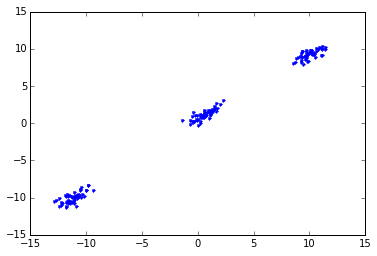

In [16]:
plt.plot(res[0][:, 0], res[0][:, 1], '.')

In [20]:
import sklearn
sklearn.__version__

'0.16.1'

(150, 2)


/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/sklearn/lda.py:371: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<IPython.core.display.Javascript object>


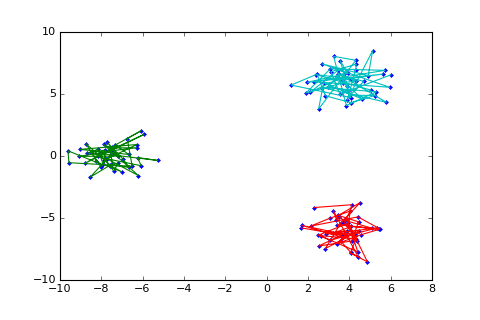

In [29]:
from sklearn.lda import LDA

clf = LDA(n_components=2)
xx = clf.fit_transform(data_X.T, data_y)

print(xx.shape)
%matplotlib notebook
# ax.scatter3D(xx[:, 0], xx[:, 1], xx[:, 2])
plt.plot(xx[:, 0], xx[:, 1], '.')

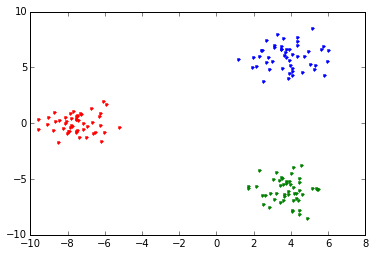

In [34]:
%matplotlib inline
for c, r in zip(np.unique(data_y), ['r.', 'g.', 'b.']):
    plt.plot(xx[data_y == c][:, 0], xx[data_y == c][:, 1], r)

/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


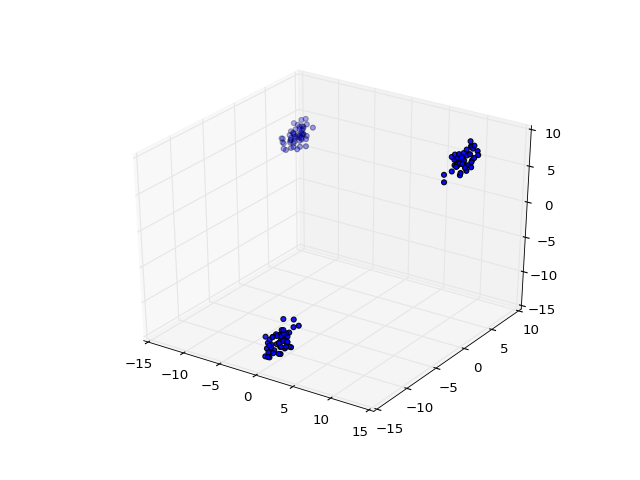

In [18]:
%matplotlib notebook
ax = plt.axes(projection='3d')

ax.scatter3D(res[0][:, 0], res[0][:, 2], res[0][:, 2])

In [ ]:
plt.imshow(res[1][-1])
plt.colorbar()

In [ ]:
plt.plot(res[-1][0])

In [ ]:
plt_rex.plot2d(res[0][data_y == 1.0])

## Task 3.4
### Exploring Numerical Instabilities
***

## References

- 

***
## Questions?